<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/3_Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Plotting sigmoid

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [0]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(w*x+b)))

In [90]:
sigmoid(1,0.5,0)

0.6224593312018546

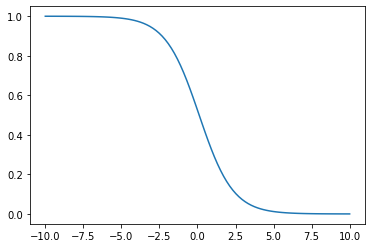

In [91]:
w = -0.9       #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.1        #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
   return 1/(1+np.exp(-(w1*x1+w2*x2+b)))


In [93]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [95]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape,"\n",X2.shape,"\n",XX1.shape,"\n",XX2.shape)

(100,) 
 (100,) 
 (100, 100) 
 (100, 100)


In [0]:
W1 = 0.5
W2 = 0.5
b = 0
Y = sigmoid_2d(XX1,XX2,W1,W2,b)

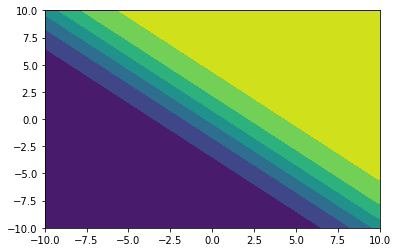

In [97]:
plt.contourf(XX1,XX2,Y)
plt.show()

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

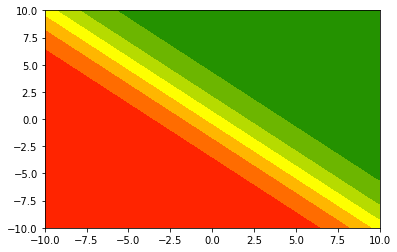

In [99]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap)
plt.show()

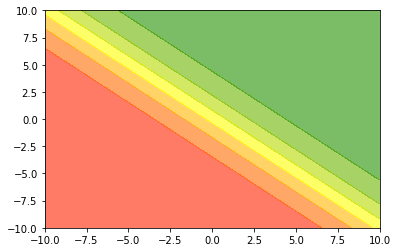

In [100]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap, alpha = 0.6)
plt.show()

Text(0.5, 0, 'y')

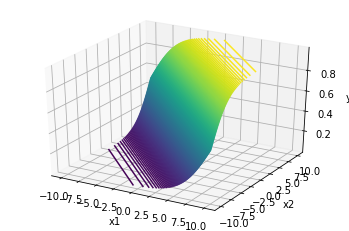

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Text(0.5, 0, 'y')

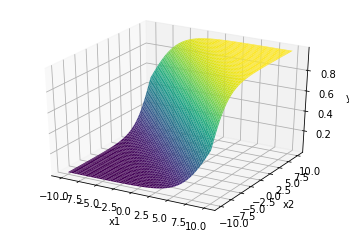

In [102]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


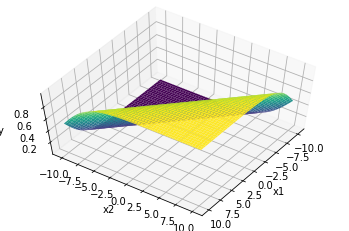

In [103]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(60,35)

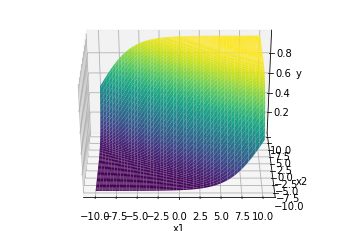

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,270)

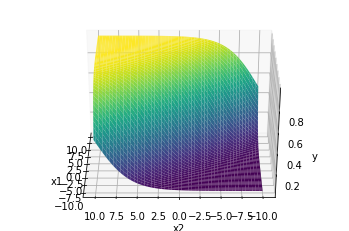

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

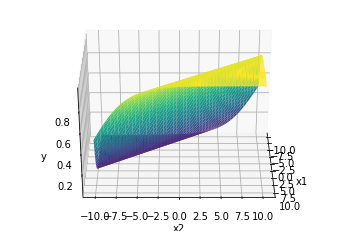

In [106]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,0)

If one of the weight becomes significant larger : 

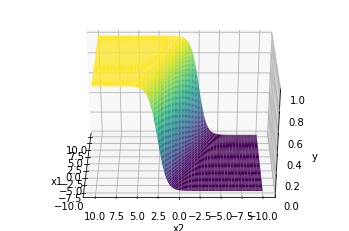

In [107]:
W1 = 0.5
W2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2,W1,W2,b)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

#Compute Loss for a given dataset

In [0]:
w_uk = 0.5
b_uk = 0.5
X = np.random.random(25) * 20 - 10
Y = sigmoid(w_uk,X,b_uk)


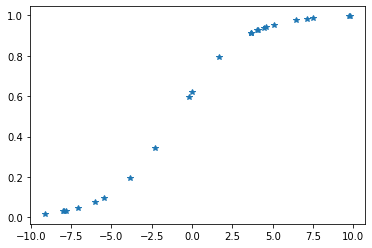

In [109]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(w_est,x,b_est))**2
  return loss


In [111]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

WW.shape


(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])


Text(0.5, 0, 'Loss')

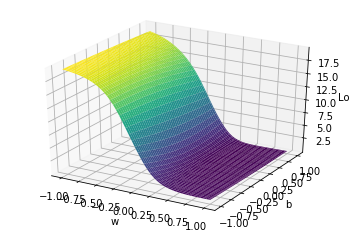

In [113]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

#When w<0, Loss is High

Text(0.5, 0, 'Loss')

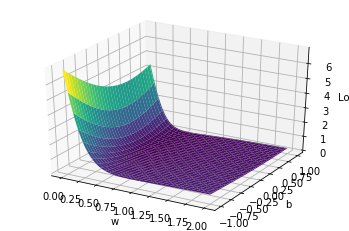

In [114]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

WW.shape


for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

In [115]:
ij = np.argmin(Loss)
i = int(np.floor(ij /Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print(i,",",j)

75 , 25


In [116]:
print(WW[i,j],",",BB[i,j],",",Loss[i,j])

0.5 , 0.5 , 0.0


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [118]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
X.shape

(6, 2)

In [0]:
epochs = 1
learning_rate = 0.25

In [120]:
sn = SigmoidNeuron()
sn.fit(X,Y,epochs,learning_rate,True)
print(sn.w,",",sn.b)


[[ 0.01620856 -0.16445151]] , [0.0117786]


In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()




#10 epochs


[[1.73395083 1.24451133]] , [0.0074616]



[[1.74310596 1.20886978]] , [0.01596906]



[[1.75351012 1.16789239]] , [0.02580034]



[[1.76555497 1.11996193]] , [0.03734743]



[[1.77980586 1.06273695]] , [0.05117582]



[[1.79708952 0.99277517]] , [0.06811192]



[[1.8185891  0.90509484]] , [0.08933759]



[[1.84576648 0.79334073]] , [0.11631153]



[[1.87927258 0.65375802]] , [0.14967774]



[[1.91500276 0.49999922]] , [0.18531826]


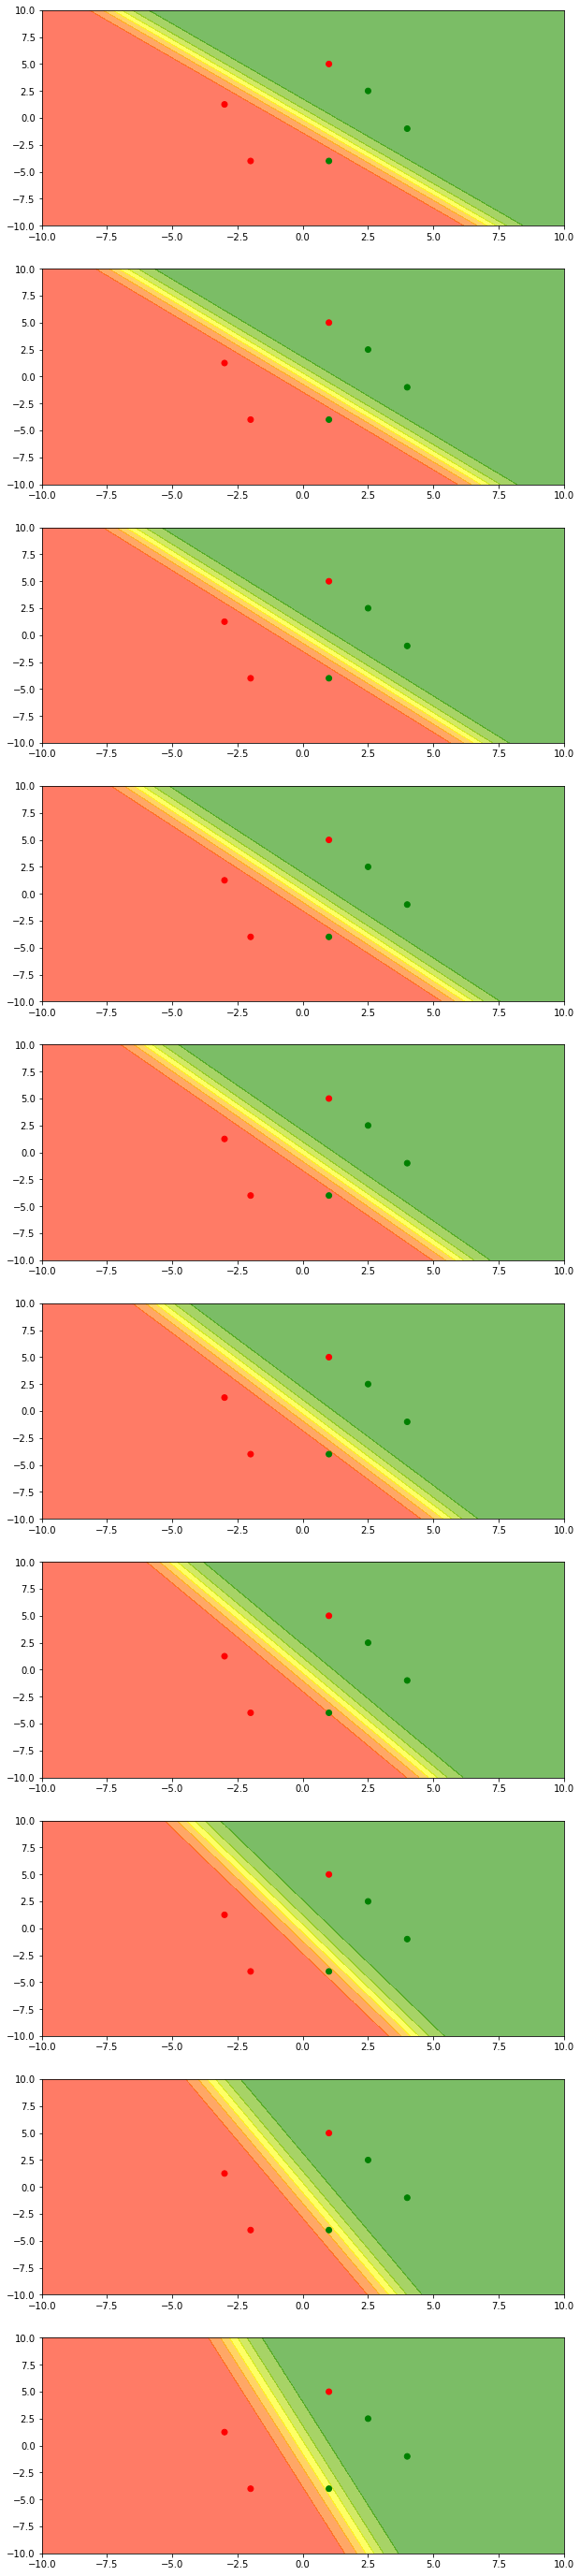

In [122]:
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  



[[ 1.1737635  -0.73506407]] , [0.0346705]



[[ 1.37546992 -0.39764591]] , [-0.01957066]



[[ 1.38734802 -0.50686907]] , [-0.0758377]



[[ 1.44542522 -0.46699886]] , [-0.12254215]



[[ 1.47343032 -0.50288814]] , [-0.16633835]



[[ 1.51048149 -0.50372454]] , [-0.20546061]



[[ 1.54069248 -0.51684577]] , [-0.24168924]



[[ 1.57027851 -0.52527487]] , [-0.27501527]



[[ 1.59771829 -0.53415642]] , [-0.30591864]



[[ 1.62363294 -0.5423377 ]] , [-0.33465523]


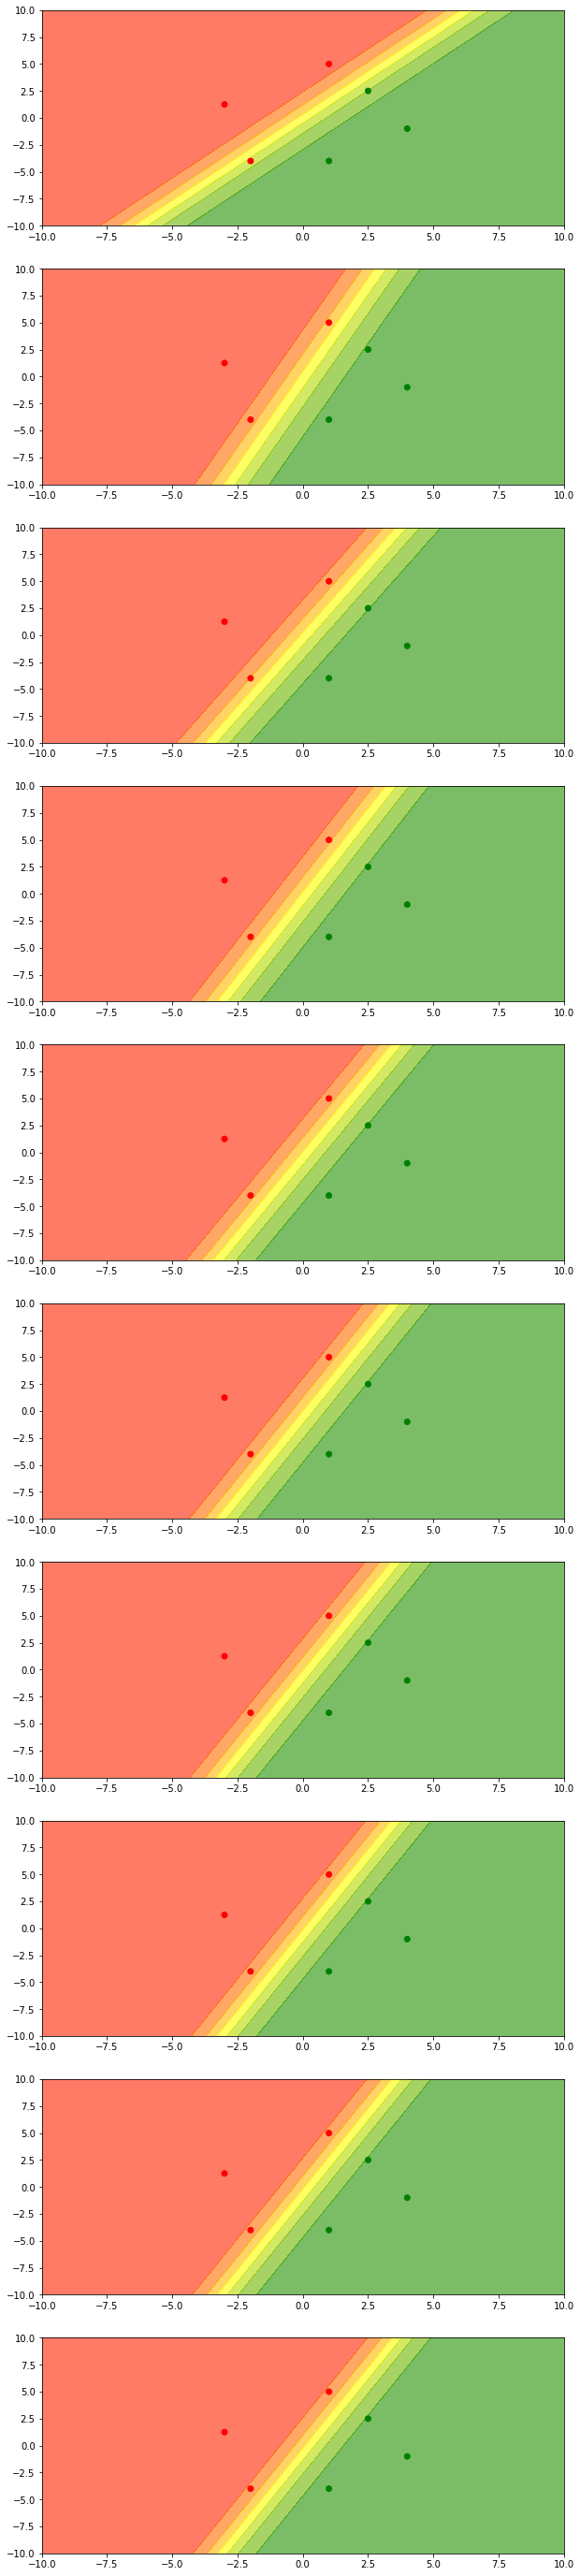

In [123]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  


[[ 0.6117019  -0.39774972]] , [-0.03213018]



[[ 0.86948233 -0.10564936]] , [-0.07139348]



[[ 0.8783434  -0.45195052]] , [-0.12990977]



[[ 1.061112   -0.21839077]] , [-0.17269003]



[[ 1.06390801 -0.45512532]] , [-0.22760672]



[[ 1.18324646 -0.32017161]] , [-0.26540323]



[[ 1.20301001 -0.4395216 ]] , [-0.30774235]



[[ 1.27237815 -0.39679779]] , [-0.33986103]



[[ 1.30644032 -0.43905242]] , [-0.37226215]



[[ 1.35083646 -0.44062683]] , [-0.40051783]



[[ 1.38685243 -0.45649954]] , [-0.42732408]



[[ 1.42201115 -0.46675431]] , [-0.45208297]



[[ 1.45449992 -0.47749231]] , [-0.47526791]



[[ 1.48509125 -0.48735586]] , [-0.49698934]



[[ 1.51390792 -0.49668146]] , [-0.51741052]



[[ 1.54114691 -0.50549335]] , [-0.53666027]



[[ 1.56696456 -0.51384562]] , [-0.55485197]



[[ 1.59149641 -0.52178207]] , [-0.57208433]



[[ 1.61485986 -0.52934074]] , [-0.58844377]



[[ 1.63715726 -0.53655481]] , [-0.60400625]


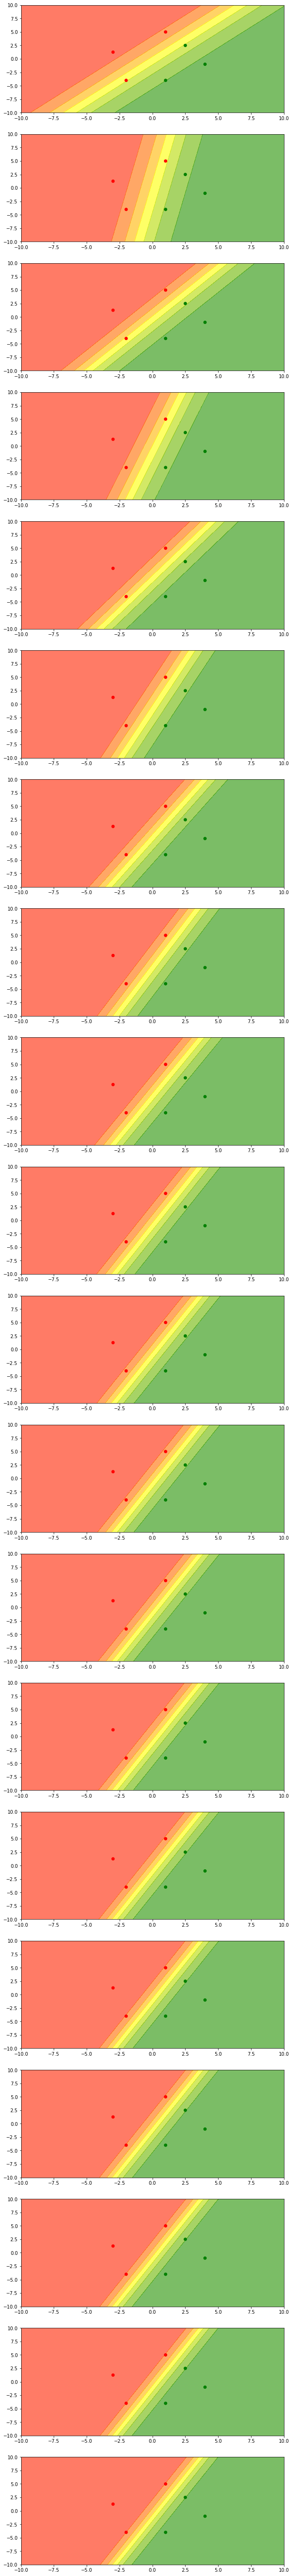

In [124]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[ 0.0320886  -1.85783774]] , [0.0182618]



[[ 0.1038239  -1.85197166]] , [0.03007005]



[[ 0.16123502 -1.83618416]] , [0.04125739]



[[ 0.21396439 -1.81240301]] , [0.05317095]



[[ 0.26686662 -1.78030018]] , [0.06670494]



[[ 0.32393393 -1.73808739]] , [0.08285682]



[[ 0.38998658 -1.68207796]] , [0.10308981]



[[ 0.47264328 -1.60509346]] , [0.12991668]



[[ 0.58641448 -1.49225732]] , [0.16818256]



[[ 0.76240182 -1.31008951]] , [0.22770917]



[[ 1.05215562 -0.99514203]] , [0.31791323]



[[ 1.34614492 -0.58244114]] , [0.32517502]



[[ 1.51720138 -0.34614002]] , [0.21041725]



[[ 1.47269525 -0.72728431]] , [0.09704176]



[[ 1.68249856 -0.35865271]] , [0.00221072]



[[ 1.61876238 -0.76139283]] , [-0.09457908]



[[ 1.79224154 -0.45408889]] , [-0.17045876]



[[ 1.75856328 -0.70272754]] , [-0.23702027]



[[ 1.84581656 -0.56935105]] , [-0.28406771]



[[ 1.85367208 -0.64313871]] , [-0.32459225]


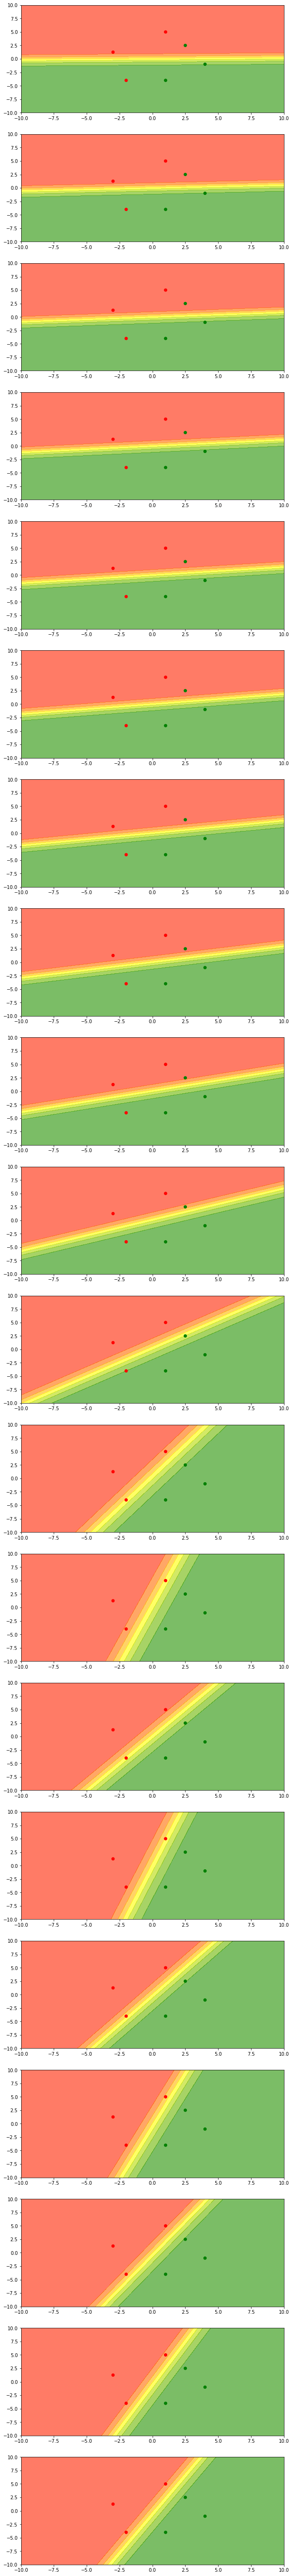

In [125]:
learning_rate = 0.75
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[ 0.51136357 -0.24829047]] , [0.02958433]



[[ 0.74547795 -0.15491323]] , [-0.02429252]



[[ 0.80999046 -0.37566578]] , [-0.08532445]



[[ 0.97457453 -0.21531637]] , [-0.13281112]



[[ 0.99544221 -0.42563417]] , [-0.1885507]



[[ 1.12140244 -0.29398219]] , [-0.2292324]



[[ 1.14286046 -0.4307717 ]] , [-0.27514349]



[[ 1.22463009 -0.37071381]] , [-0.30963244]



[[ 1.25766478 -0.43043562]] , [-0.34522621]



[[ 1.30932231 -0.42311689]] , [-0.37524069]



[[ 1.3467233  -0.44490459]] , [-0.40411446]



[[ 1.38524545 -0.45414683]] , [-0.43042651]



[[ 1.4198948  -0.46621661]] , [-0.45508868]



[[ 1.45261681 -0.47663614]] , [-0.47809996]



[[ 1.48328291 -0.48658822]] , [-0.49968299]



[[ 1.51218495 -0.49594133]] , [-0.51997693]



[[ 1.53949913 -0.50478282]] , [-0.53911161]



[[ 1.56538497 -0.51316184]] , [-0.55719855]



[[ 1.58997893 -0.52112277]] , [-0.57433516]



[[ 1.61339924 -0.52870396]] , [-0.59060674]



[[ 1.63574892 -0.53593883]] , [-0.60608831]



[[ 1.65711828 -0.54285664]] , [-0.62084613]



[[ 1.67758687 -0.54948319]] , [-0.63493891]



[[ 1.69722514 -0.5558413 ]] , [-0.64841888]



[[ 1.71609573 -0.56195128]] , [-0.66133268]



[[ 1.73425458 -0.56783123]] , [-0.67372208]



[[ 1.75175183 -0.5734974 ]] , [-0.68562462]



[[ 1.76863261 -0.57896439]] , [-0.69707413]



[[ 1.78493765 -0.5842454 ]] , [-0.70810119]



[[ 1.80070385 -0.58935234]] , [-0.71873353]


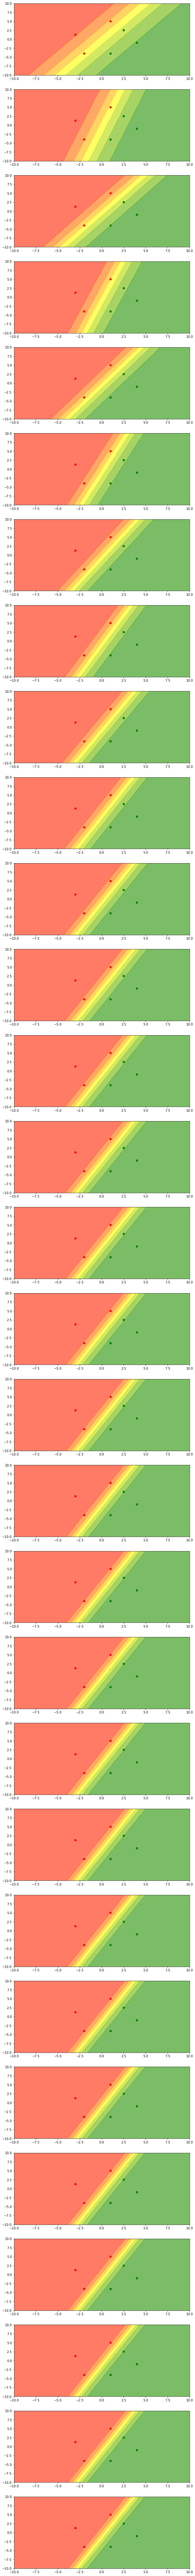

In [126]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[-0.06030095  0.42846113]] , [0.01976568]



[[ 0.56358491 -0.04895001]] , [0.04627077]



[[ 0.67249828 -0.38975006]] , [-0.0116592]



[[ 0.89863888 -0.13802826]] , [-0.05842952]



[[ 0.90860403 -0.44544421]] , [-0.12016571]



[[ 1.07604698 -0.23755389]] , [-0.16504179]



[[ 1.08254789 -0.45050884]] , [-0.21974407]



[[ 1.19311491 -0.33205737]] , [-0.25838309]



[[ 1.21553121 -0.43843892]] , [-0.30046457]



[[ 1.28100811 -0.40321831]] , [-0.33325426]



[[ 1.31574638 -0.44109758]] , [-0.36585005]



[[ 1.35887854 -0.4442937 ]] , [-0.39455048]



[[ 1.39460894 -0.45932712]] , [-0.42165036]



[[ 1.42924925 -0.46960884]] , [-0.44670693]



[[ 1.46135512 -0.48016207]] , [-0.47014781]



[[ 1.49159047 -0.48990448]] , [-0.49210154]



[[ 1.52009079 -0.49911449]] , [-0.51273252]



[[ 1.5470445  -0.50782253]] , [-0.53217306]



[[ 1.57260366 -0.51608034]] , [-0.55053906]



[[ 1.59690012 -0.52393048]] , [-0.56793132]



[[ 1.62004824 -0.53140995]] , [-0.58443804]



[[ 1.64214786 -0.53855105]] , [-0.60013663]



[[ 1.66328662 -0.54538212]] , [-0.61509541]



[[ 1.68354184 -0.55192816]] , [-0.62937483]



[[ 1.70298203 -0.55821131]] , [-0.64302863]



[[ 1.72166821 -0.56425129]] , [-0.65610474]



[[ 1.73965491 -0.57006573]] , [-0.66864607]



[[ 1.75699108 -0.57567042]] , [-0.68069113]



[[ 1.77372076 -0.5810796 ]] , [-0.69227462]



[[ 1.78988377 -0.58630611]] , [-0.70342789]


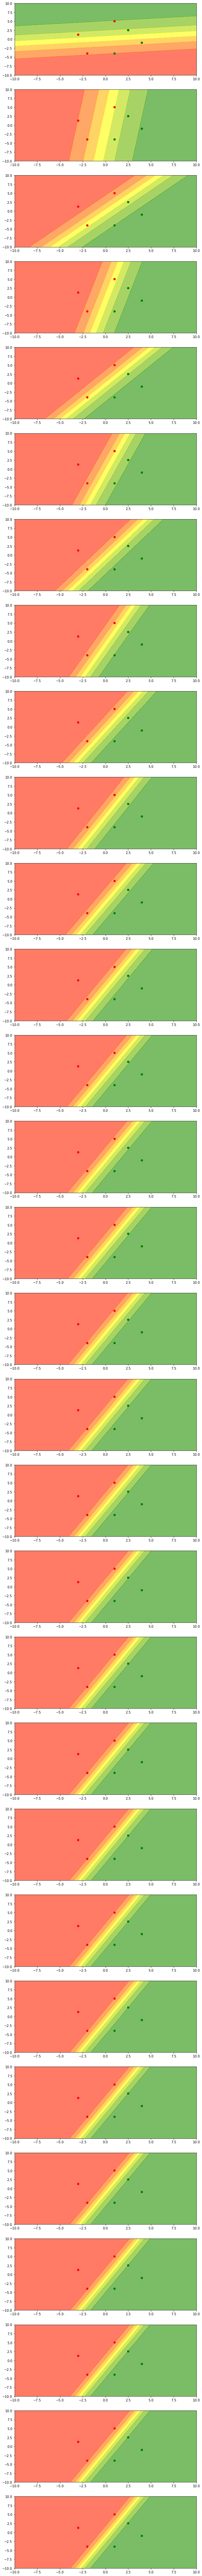

In [127]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[ 1.10294979 -1.20521675]] , [0.00456287]



[[ 1.33505973 -0.9144125 ]] , [0.04423056]



[[ 1.53600418 -0.57383154]] , [-0.00440035]



[[ 1.59472331 -0.51709112]] , [-0.05197633]



[[ 1.61777748 -0.55356354]] , [-0.09601817]



[[ 1.65040016 -0.5540139 ]] , [-0.13565849]



[[ 1.67714547 -0.56509284]] , [-0.17237586]



[[ 1.70309296 -0.57277748]] , [-0.20631538]



[[ 1.72728734 -0.58052368]] , [-0.23786792]



[[ 1.7501182  -0.58775186]] , [-0.26729527]



[[ 1.77170345 -0.59459286]] , [-0.29483251]



[[ 1.79217162 -0.6010788 ]] , [-0.32067924]



[[ 1.81163117 -0.60724409]] , [-0.34500731]



[[ 1.83017617 -0.6131184 ]] , [-0.36796534]



[[ 1.84788852 -0.61872765]] , [-0.38968254]



[[ 1.86483992 -0.62409457]] , [-0.41027173]



[[ 1.88109342 -0.62923917]] , [-0.42983192]



[[ 1.89670473 -0.63417919]] , [-0.44845035]



[[ 1.91172325 -0.63893036]] , [-0.46620423]



[[ 1.92619299 -0.64350673]] , [-0.48316213]



[[ 1.94015333 -0.64792085]] , [-0.49938521]



[[ 1.95363957 -0.65218402]] , [-0.51492819]



[[ 1.96668352 -0.6563064 ]] , [-0.5298402]



[[ 1.97931392 -0.66029717]] , [-0.54416549]



[[ 1.9915568  -0.66416467]] , [-0.55794403]



[[ 2.00343584 -0.66791646]] , [-0.57121204]



[[ 2.01497259 -0.67155945]] , [-0.58400242]



[[ 2.02618677 -0.67509996]] , [-0.59634513]



[[ 2.03709644 -0.67854374]] , [-0.60826752]



[[ 2.04771817 -0.68189612]] , [-0.61979464]


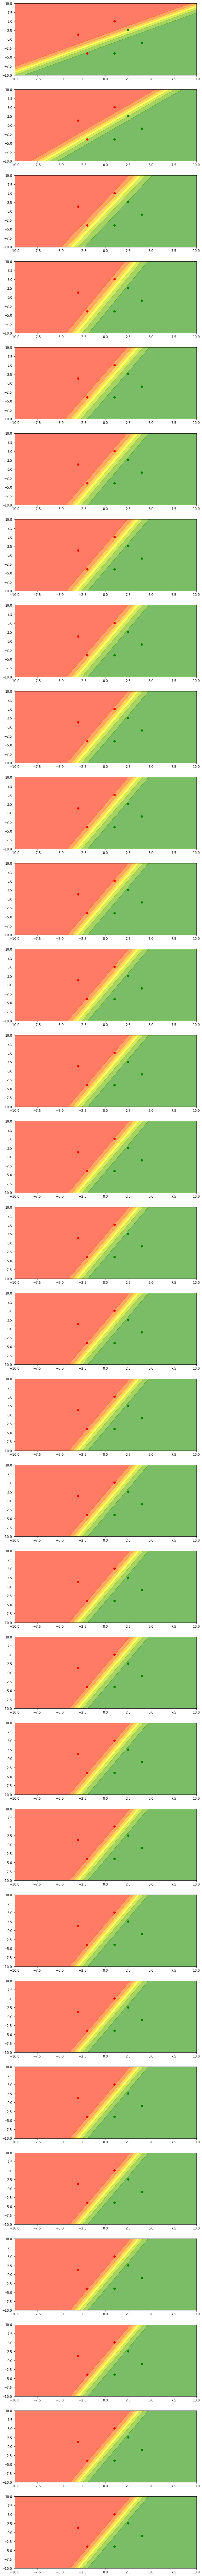

In [128]:
learning_rate = 0.5
sn.fit(X,Y,epochs,0.05,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

In [129]:
!ls

mobile_cleaned.csv  sample_data


# Section 1 : Loading Data

In [130]:

data = pd.read_csv('mobile_cleaned.csv')
data.head()

PhoneId  Pixel Density  Screen Size  ...  Sim1_3G  Sim1_4G  Rating
0        0            403         6.26  ...        0        1     4.5
1        1            271         6.20  ...        0        1     4.5
2        2            409         6.30  ...        0        1     4.4
3        4            411         6.00  ...        0        1     4.3
4        5            396         6.50  ...        0        1     4.4

[5 rows x 88 columns]

In [131]:
data.shape

(341, 88)

In [132]:
Xd  = data.drop(['Rating'], axis = 1)
Y = data['Rating'].values
Xd.head()


PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0        0            403         6.26  ...        0        0        1
1        1            271         6.20  ...        0        0        1
2        2            409         6.30  ...        0        0        1
3        4            411         6.00  ...        0        0        1
4        5            396         6.50  ...        0        0        1

[5 rows x 87 columns]

In [133]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [134]:
# binarisation of Rating
threshold = 4
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [135]:
Xd  = data.drop(['Rating','Class'], axis = 1)
Y = data['Rating'].values
Xd.head()

PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0        0            403         6.26  ...        0        0        1
1        1            271         6.20  ...        0        0        1
2        2            409         6.30  ...        0        0        1
3        4            411         6.00  ...        0        0        1
4        5            396         6.50  ...        0        0        1

[5 rows x 87 columns]

In [136]:
data['Class'].value_counts(normalize = True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

In [137]:
# binarisation of Rating
threshold = 4.1
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize = True)

1    0.58651
0    0.41349
Name: Class, dtype: float64

In [138]:
# binarisation of Rating
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [139]:
Y_binarised = data['Class'].values
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Section 2 : Standardisation
# z = (x - u) / s ;  u is mean here and s is standard deviation
# mean should be zero and standard deviation should be 1 

In [140]:
R = np.random.random([100,1])
R

array([[0.86164148],
       [0.24641344],
       [0.69109841],
       [0.30425387],
       [0.7574187 ],
       [0.95000308],
       [0.32685905],
       [0.53780137],
       [0.67772732],
       [0.37335533],
       [0.25266914],
       [0.50647976],
       [0.36772892],
       [0.08987983],
       [0.91635725],
       [0.78503307],
       [0.61664606],
       [0.49099806],
       [0.51195082],
       [0.28951581],
       [0.51858358],
       [0.48426557],
       [0.11033142],
       [0.87294658],
       [0.006289  ],
       [0.95275946],
       [0.96136702],
       [0.25617669],
       [0.33315812],
       [0.67026327],
       [0.89146039],
       [0.15258822],
       [0.61985914],
       [0.84674652],
       [0.39290461],
       [0.55201928],
       [0.07611313],
       [0.54305158],
       [0.21891537],
       [0.88364494],
       [0.70275871],
       [0.20520248],
       [0.7953791 ],
       [0.29338084],
       [0.99099074],
       [0.99777202],
       [0.41877713],
       [0.475

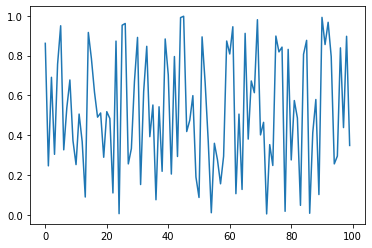

In [141]:
plt.plot(R)
plt.show()

In [142]:
np.mean(R)

0.523466794993426

In [143]:
np.std(R)

0.2991274610375898

In [144]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [145]:
scaler.mean_

array([0.52346679])

In [146]:
RT = scaler.transform(R)
np.mean(RT)

2.042810365310288e-16

In [147]:
np.std(RT)

0.9999999999999998

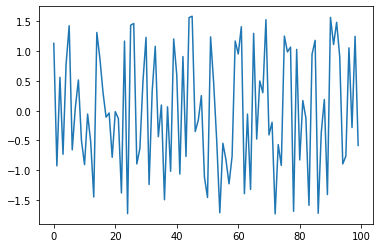

In [148]:
plt.plot(RT)
plt.show()

In [149]:
X_train , X_test , Y_train , Y_test = train_test_split(Xd,Y,random_state = 1, stratify = Y_binarised)
print("X = ",Xd.shape,"\n","X_train = ",X_train.shape,"\n","X_test =",X_test.shape) 

X =  (341, 87) 
 X_train =  (255, 87) 
 X_test = (86, 87)


In [0]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [152]:
np.max(Y_scaled_train)

1.0

In [153]:
np.min(Y_scaled_train)

0.0

In [154]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]
scaled_threshold 

0.6800000000000002

#We need to binarize the ground truth before before using it for training or calculating accuracy because we are doing classification of whether or not to buy a phone , where the classes are either 0 or 1.

In [0]:
Y_binarised_train = (Y_scaled_train >= scaled_threshold).astype(np.int).ravel()
Y_binarised_test = (Y_scaled_test >= scaled_threshold).astype("int").ravel()

  #Train on Real Data

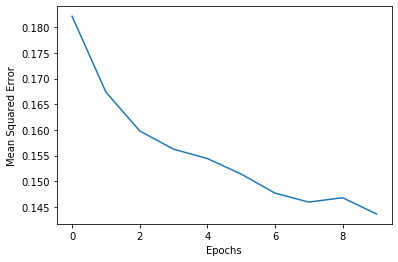

In [156]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=10, learning_rate=0.2, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [160]:
accuracy_train

0.7372549019607844

In [161]:
accuracy_test

0.5930232558139535

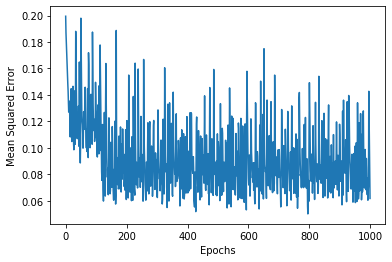

Train accuracy =  0.6823529411764706 
 Test accuracy =  0.7093023255813954


In [162]:
epochs = 1000
learning_rate = 0.2
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate, display_loss=True)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)

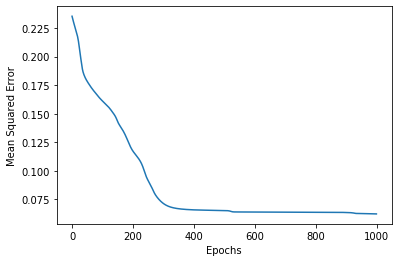

Train accuracy =  0.7764705882352941 
 Test accuracy =  0.7209302325581395


In [163]:
epochs = 1000
learning_rate = 0.01
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate, display_loss=True)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)

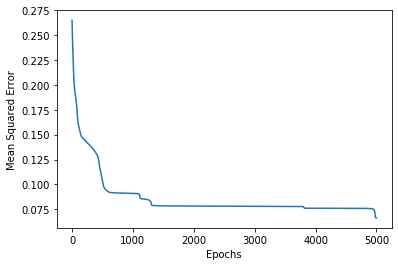

Train accuracy =  0.7294117647058823 
 Test accuracy =  0.7209302325581395


In [164]:
epochs = 5000
learning_rate = 0.01
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate, display_loss=True)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)